<a href="https://colab.research.google.com/github/kr19al0711/cs985-spotify-regression-lakkh/blob/draft%2F1222025/CS985_Regression_Spotify_2_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [172]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [173]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

cs_985_6_spotify_regression_problem_2025_path = kagglehub.competition_download('cs-985-6-spotify-regression-problem-2025')

print('Data source import complete.')


Data source import complete.


In [229]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor


In [175]:
# Import training and testing datasets
spotify_train = pd.read_csv(cs_985_6_spotify_regression_problem_2025_path + "/CS98XRegressionTrain.csv")
spotify_test = pd.read_csv(cs_985_6_spotify_regression_problem_2025_path + "/CS98XRegressionTest.csv")


In [176]:
spotify_train.head()

,Id,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,My Happiness,Connie Francis,adult standards,1996,107,31,45,-8,13,28,150,75,3,44
1,2,Unchained Melody,The Teddy Bears,NaN,2011,114,44,53,-8,13,47,139,49,3,37
2,3,How Deep Is Your Love,Bee Gees,adult standards,1979,105,36,63,-9,13,67,245,11,3,77
3,4,Woman in Love,Barbra Streisand,adult standards,1980,170,28,47,-16,13,33,232,25,3,67
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,glam rock,1973,121,47,56,-8,15,40,193,45,3,63


In [177]:
spotify_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         453 non-null    int64 
 1   title      453 non-null    object
 2   artist     453 non-null    object
 3   top genre  438 non-null    object
 4   year       453 non-null    int64 
 5   bpm        453 non-null    int64 
 6   nrgy       453 non-null    int64 
 7   dnce       453 non-null    int64 
 8   dB         453 non-null    int64 
 9   live       453 non-null    int64 
 10  val        453 non-null    int64 
 11  dur        453 non-null    int64 
 12  acous      453 non-null    int64 
 13  spch       453 non-null    int64 
 14  pop        453 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 53.2+ KB


There are 3 categorical variables title, artist and top genre.
Also the top genre feature has Null values that would have to be dealt with.

# Exploratory Data Analysis

## Analysing Numerical Features

In [178]:
numerical_features = ["year","bpm","nrgy","dnce","dB","live","val","dur","acous","spch","pop"]
categorical_features = ["artist","title","top genre","pop"]

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'bpm'}>,
        <Axes: title={'center': 'nrgy'}>],
       [<Axes: title={'center': 'dnce'}>, <Axes: title={'center': 'dB'}>,
        <Axes: title={'center': 'live'}>],
       [<Axes: title={'center': 'val'}>, <Axes: title={'center': 'dur'}>,
        <Axes: title={'center': 'acous'}>],
       [<Axes: title={'center': 'spch'}>,
        <Axes: title={'center': 'pop'}>, <Axes: >]], dtype=object)

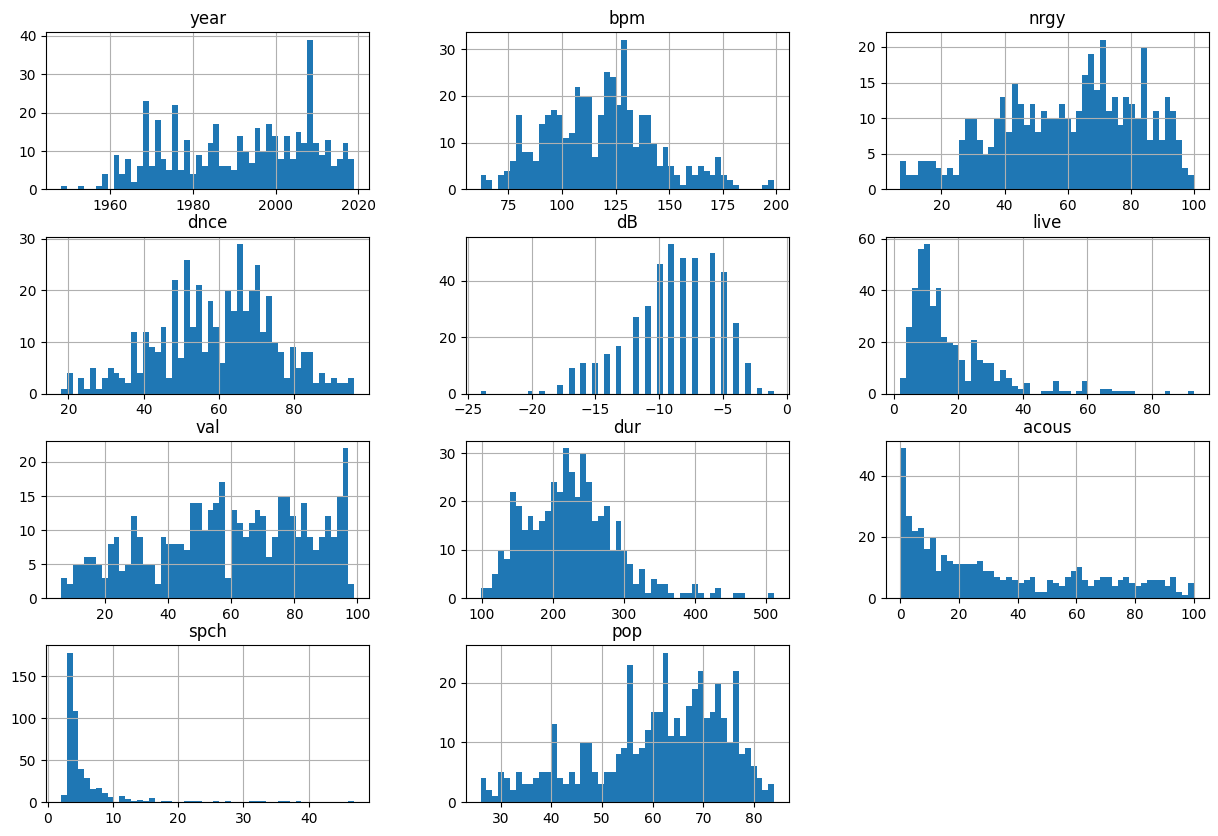

In [179]:
spotify_train[numerical_features].hist(bins=50, figsize=(15,10))

## Correlation between popularity score and other features

<Axes: >

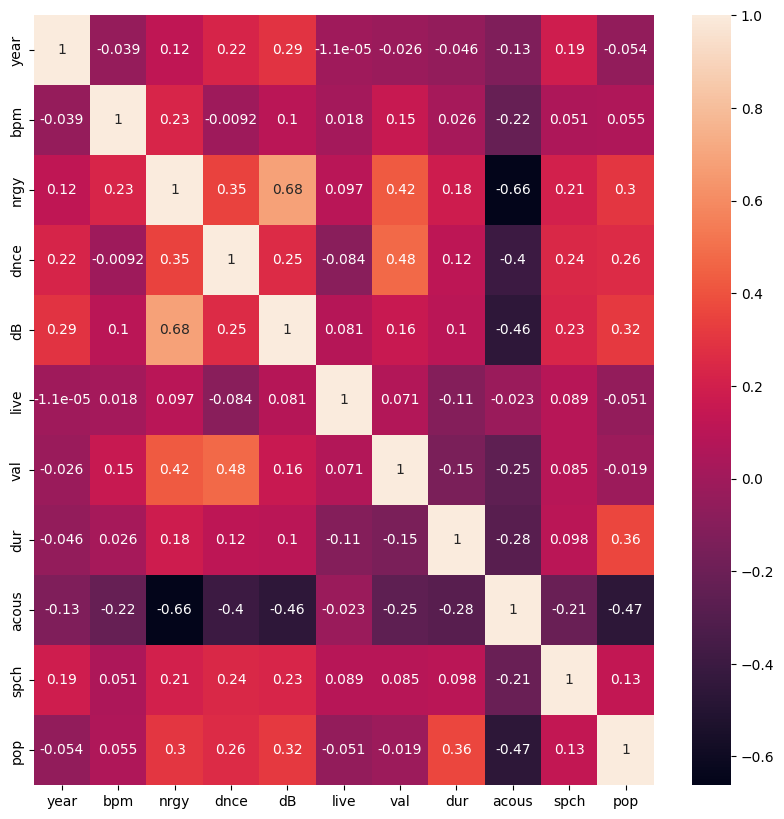

In [180]:
spotify_corr = spotify_train[numerical_features].corr()
plt.figure(figsize=(10,10))
sns.heatmap(spotify_corr, annot=True)

In [181]:
# Correlation of features with Popularity scores
spotify_corr['pop'].sort_values(ascending=False)

,pop
pop,1.000000
dur,0.363266
dB,0.316854
nrgy,0.303797
dnce,0.258670
spch,0.130955
bpm,0.055024
val,-0.018713
live,-0.051364
year,-0.054293


<Axes: title={'center': 'Correlation between Popularity score and Year of release'}, xlabel='year', ylabel='pop'>

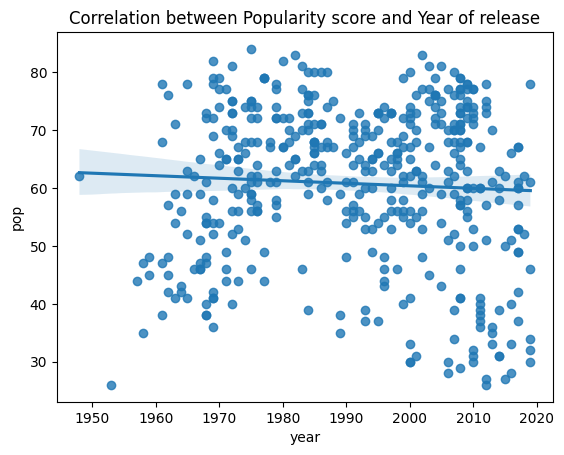

In [182]:
plt.title("Correlation between Popularity score and Year of release")
sns.regplot(x=spotify_train["year"],y=spotify_train["pop"])

<Axes: title={'center': 'Correlation between Popularity score and BPM'}, xlabel='bpm', ylabel='pop'>

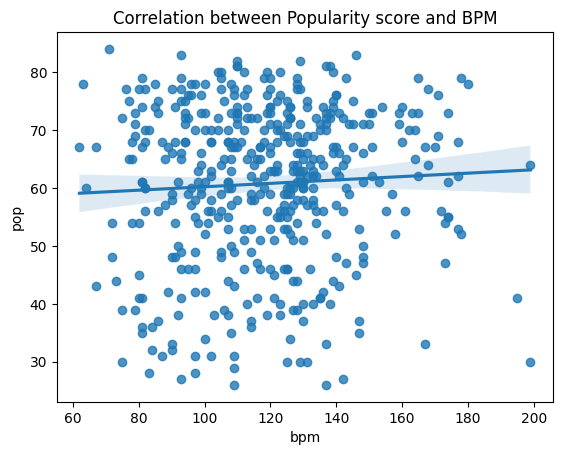

In [183]:
plt.title("Correlation between Popularity score and BPM")
sns.regplot(x=spotify_train["bpm"],y=spotify_train["pop"])

<Axes: title={'center': 'Correlation between Popularity score and Energy'}, xlabel='nrgy', ylabel='pop'>

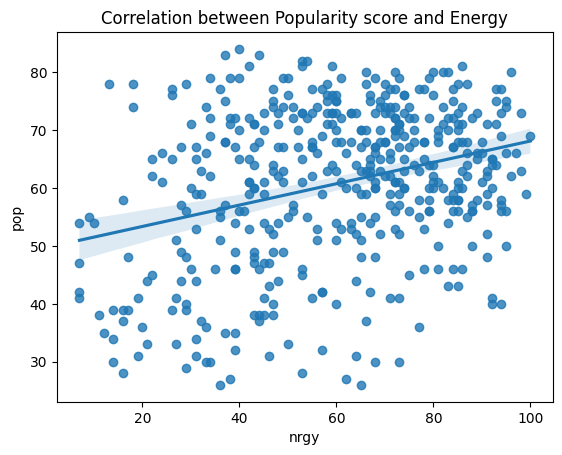

In [184]:
plt.title("Correlation between Popularity score and Energy")
sns.regplot(x=spotify_train["nrgy"],y=spotify_train["pop"])

<Axes: title={'center': 'Correlation between Popularity score and Danceability'}, xlabel='dnce', ylabel='pop'>

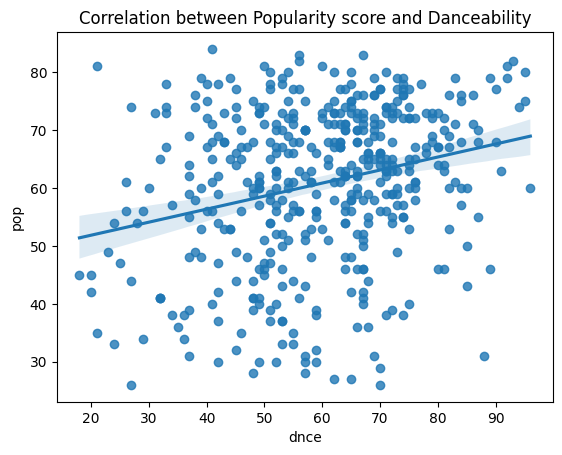

In [185]:
plt.title("Correlation between Popularity score and Danceability")
sns.regplot(x=spotify_train["dnce"],y=spotify_train["pop"])

<Axes: title={'center': 'Correlation between Popularity score and dB'}, xlabel='dB', ylabel='pop'>

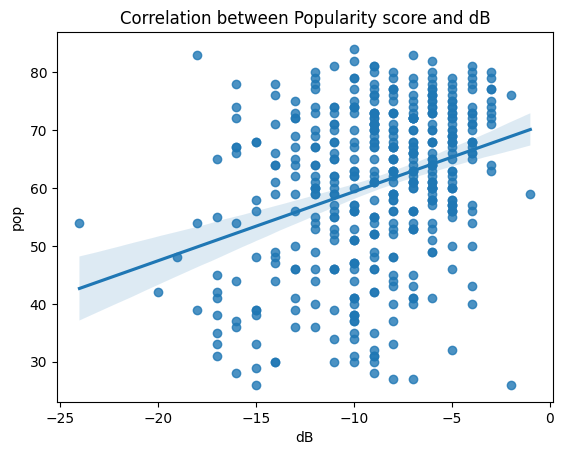

In [186]:
plt.title("Correlation between Popularity score and dB")
sns.regplot(x=spotify_train["dB"],y=spotify_train["pop"])

<Axes: title={'center': 'Correlation between Popularity score and Live'}, xlabel='live', ylabel='pop'>

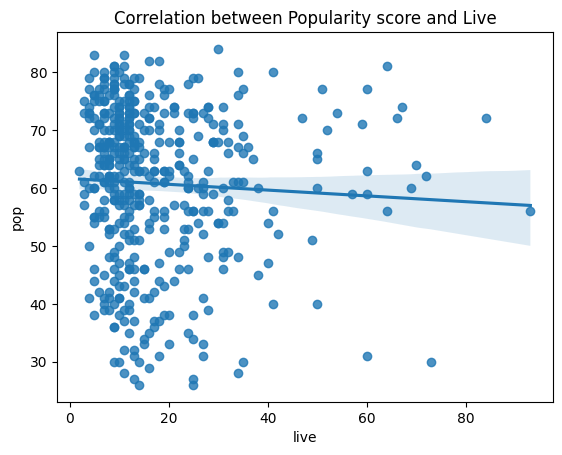

In [187]:
plt.title("Correlation between Popularity score and Live")
sns.regplot(x=spotify_train["live"],y=spotify_train["pop"])

<Axes: title={'center': 'Correlation between Popularity score and Valence'}, xlabel='val', ylabel='pop'>

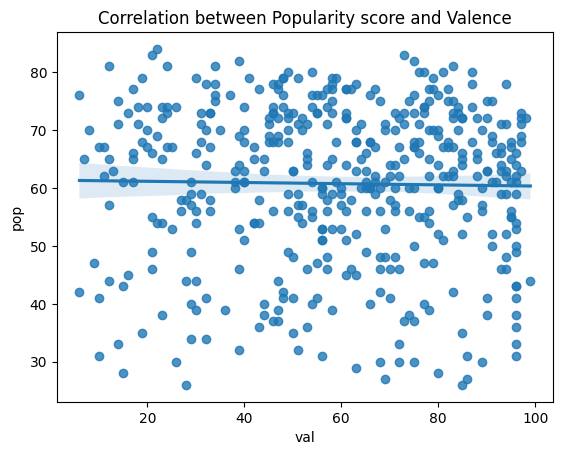

In [188]:
plt.title("Correlation between Popularity score and Valence")
sns.regplot(x=spotify_train["val"],y=spotify_train["pop"])

<Axes: title={'center': 'Correlation between Popularity score and Duration'}, xlabel='dur', ylabel='pop'>

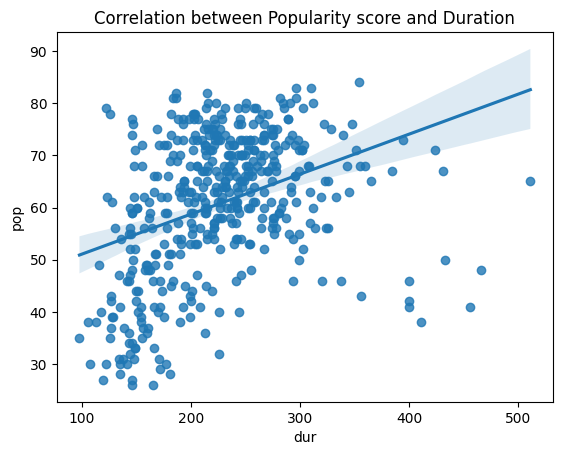

In [189]:
plt.title("Correlation between Popularity score and Duration")
sns.regplot(x=spotify_train["dur"],y=spotify_train["pop"])

<Axes: title={'center': 'Correlation between Popularity score and Speechiness'}, xlabel='spch', ylabel='pop'>

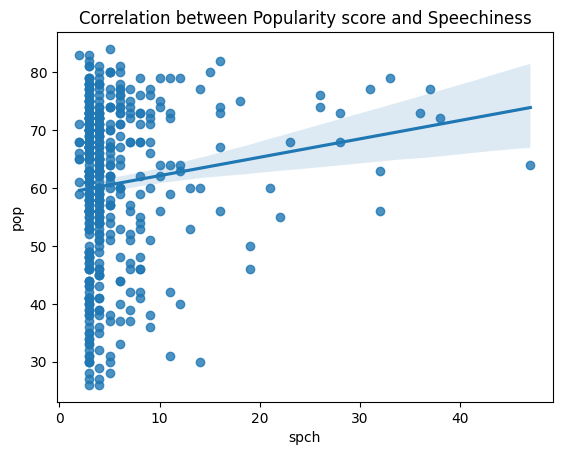

In [190]:
plt.title("Correlation between Popularity score and Speechiness")
sns.regplot(x=spotify_train["spch"],y=spotify_train["pop"])

<Axes: title={'center': 'Correlation between Popularity score and Acoustic'}, xlabel='acous', ylabel='pop'>

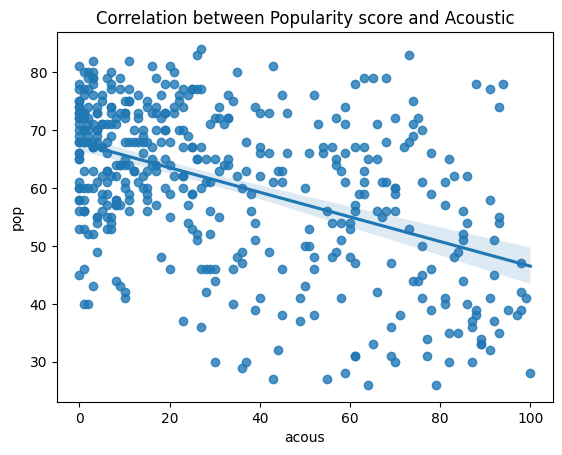

In [191]:
plt.title("Correlation between Popularity score and Acoustic")
sns.regplot(x=spotify_train["acous"],y=spotify_train["pop"])

We can see that dataset features  year, valence, liveness, bpm show  little to no correlation  with the popularity score.



# Analysing Categorical Features

In [192]:
spotify_train[categorical_features]

,artist,title,top genre,pop
0,Connie Francis,My Happiness,adult standards,44
1,The Teddy Bears,Unchained Melody,NaN,37
2,Bee Gees,How Deep Is Your Love,adult standards,77
3,Barbra Streisand,Woman in Love,adult standards,67
4,Elton John,Goodbye Yellow Brick Road - Remastered 2014,glam rock,63
...,...,...,...,...
448,Ella Fitzgerald,But Not For Me,adult standards,45
449,Jan & Dean,Surf City,brill building pop,50
450,Nelly,Dilemma,dance pop,77
451,*NSYNC,It's Gonna Be Me,boy band,62


# Analysing Artist Popularity

In [193]:
average_popularity_score_by_artist = spotify_train[["artist","pop"]].groupby("artist").mean().sort_values("pop",ascending=False)

In [194]:
#Artist who have previously released songs with high popularity score
average_popularity_score_by_artist.head(10)

,pop
artist,
TOTO,83.0
Coldplay,82.0
Linkin Park,81.0
Matthew Wilder,81.0
Tears For Fears,80.0
TLC,79.0
Estelle,79.0
Fleetwood Mac,79.0
Flo Rida,79.0


In [195]:
average_popularity_score_by_artist.describe()

,pop
count,345.000000
mean,59.409887
std,13.500250
min,26.000000
25%,52.000000
50%,61.500000
75%,70.000000
max,83.000000


In [196]:
#Artist who have previously released songs with low popularity score
average_popularity_score_by_artist.tail(10)

,pop
artist,
Tommy Steele,30.0
Joey Dee,30.0
The Beau Brummels,30.0
Jayne Mansfield,29.0
Ike Carpenter Orchestra,28.0
Green Martini Keys,28.0
Terry Dene,27.0
Suzi Miller And Johnson Brothers,27.0
Anthony Newley,26.0


# Data Preprocessing

## Representing artist by their historical popularity score

In [197]:
default_popularity = 60

# Create the 'artist_popularity' feature
spotify_train['artist_popularity'] = spotify_train['artist'].map(average_popularity_score_by_artist['pop']).fillna(default_popularity)
spotify_test["artist_popularity"] = spotify_test['artist'].map(average_popularity_score_by_artist['pop']).fillna(default_popularity)
spotify_train.drop(columns="artist", inplace= True)
spotify_test.drop(columns="artist", inplace= True)

In [201]:
spotify_train.head()

,Id,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,artist_popularity
0,1,adult standards,1996,107,31,45,-8,13,28,150,75,3,44,44.000000
1,2,NaN,2011,114,44,53,-8,13,47,139,49,3,37,38.500000
2,3,adult standards,1979,105,36,63,-9,13,67,245,11,3,77,77.000000
3,4,adult standards,1980,170,28,47,-16,13,33,232,25,3,67,59.333333
4,5,glam rock,1973,121,47,56,-8,15,40,193,45,3,63,68.777778


In [202]:
spotify_test.head()

,Id,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,artist_popularity
0,454,dance pop,2005,154,93,65,-3,75,74,213,1,18,73.333333
1,455,glam rock,1994,161,39,30,-15,11,14,292,26,3,68.777778
2,456,glam rock,1977,64,46,27,-7,12,18,179,38,3,73.285714
3,457,big beat,2010,127,92,71,-9,37,53,216,6,4,60.000000
4,458,appalachian folk,2018,115,46,56,-12,21,34,153,18,3,60.000000


## Dropping song Title

In [200]:
spotify_train.drop(columns="title",inplace=True)
spotify_test.drop(columns="title",inplace=True)

In [203]:
input_features  = ["dur","dB","nrgy","dnce","spch","acous","artist_popularity"]
target = ["pop"]

X_train = spotify_train[input_features]
y_train = spotify_train[target]

X_test = spotify_test[input_features]

In [206]:
# print(X_train,y_train,X_test)

In [207]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [230]:
# model = RandomForestRegressor()
# model.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [231]:
y_predict = model.predict(X_test)

In [232]:
y_predict

array([73.42, 67.13, 64.91, 59.88, 59.85, 68.06, 57.61, 55.47, 59.53,
       60.01, 40.96, 74.44, 45.45, 59.09, 63.17, 60.01, 77.5 , 59.7 ,
       70.35, 78.57, 59.61, 58.74, 68.89, 49.95, 57.41, 60.28, 60.02,
       59.27, 36.57, 59.03, 59.47, 58.23, 73.42, 59.68, 60.47, 62.05,
       77.07, 52.27, 60.03, 61.97, 65.72, 59.47, 57.78, 58.55, 59.44,
       60.05, 71.95, 68.28, 59.99, 69.86, 62.28, 65.04, 58.24, 68.02,
       66.45, 60.2 , 58.26, 58.84, 58.24, 57.15, 60.91, 65.2 , 60.08,
       58.04, 59.66, 59.64, 60.26, 57.39, 67.45, 55.89, 59.36, 62.98,
       57.98, 66.78, 63.67, 58.36, 62.51, 60.34, 81.53, 58.  , 80.94,
       68.23, 62.04, 72.83, 46.2 , 71.66, 60.09, 74.4 , 59.04, 59.7 ,
       56.6 , 58.64, 72.74, 58.62, 58.4 , 71.03, 60.13, 58.88, 59.81,
       51.39, 58.47, 60.23, 59.57, 63.64, 37.74, 60.27, 61.5 , 59.22,
       64.03, 77.41, 60.16, 68.24, 60.05, 78.08])

In [233]:
len(spotify_test["Id"])

114

In [234]:
# prompt: create a datafrane with ID from spotify_test and y_predict

import pandas as pd

# Assuming y_predict and spotify_test are defined as in the provided code
# Create a DataFrame from the 'Id' column of spotify_test
df = pd.DataFrame({'Id': spotify_test['Id']})

# Add the y_predict values as a new column
df['pop'] = y_predict

# Now df contains the desired 'ID' and 'y_predict' columns
print(df.head())

pd.DataFrame(df).to_csv("submission.csv",index=False)


    Id    pop
0  454  73.42
1  455  67.13
2  456  64.91
3  457  59.88
4  458  59.85
